# <center>Fish market

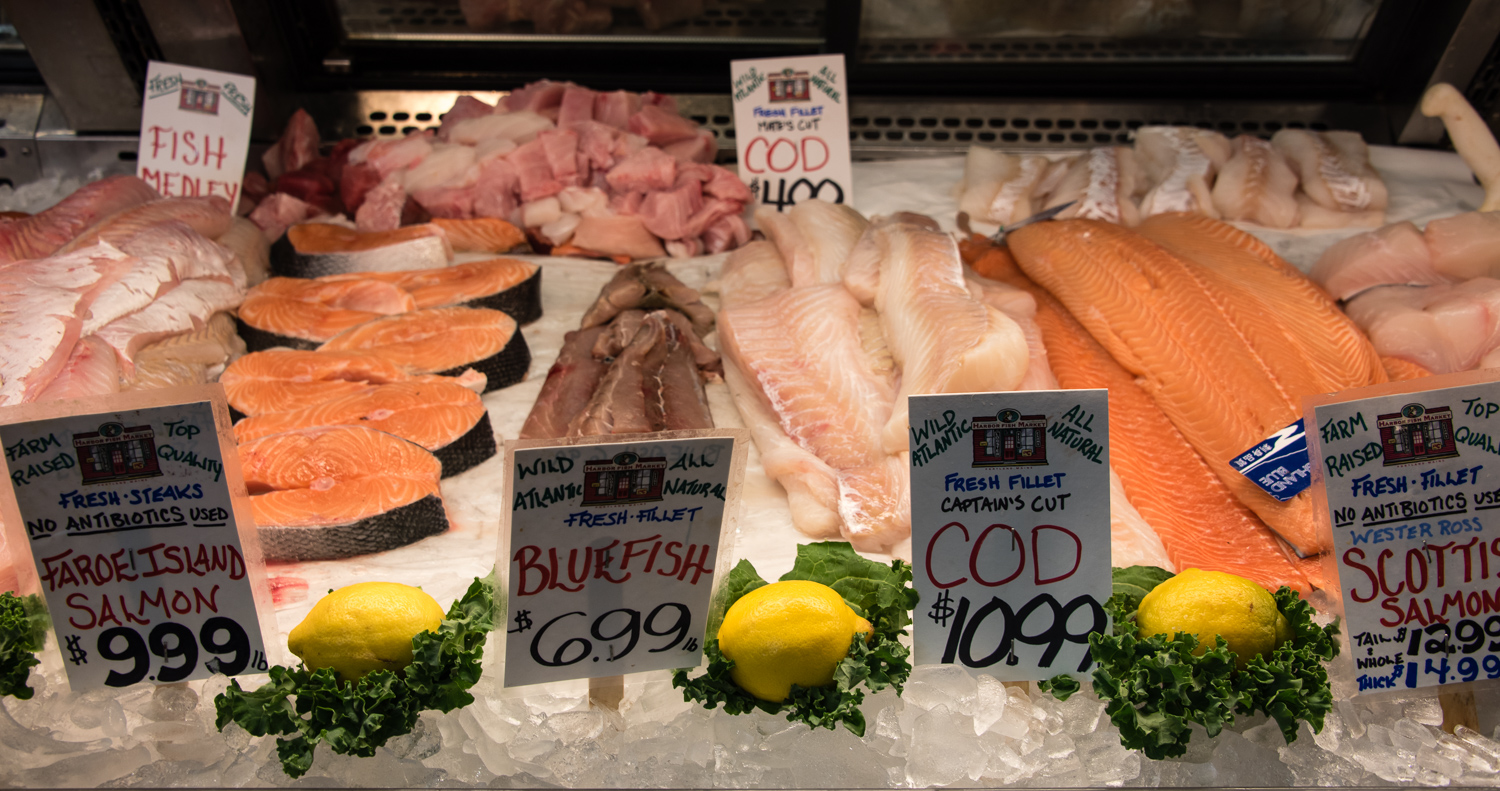

This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data. .The given dataset which provides Species name of The Fish and weight of the fish ,vertical length as Length1,diagonal length as Length2,cross length as	Length3,Height of the Fish Species,Width of Fish species.so i decided to predict the weight of fishes from the dataset is related with length,width,Height and Species of the fishes

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,RobustScaler,StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
import klib as k

###  firstly insert the dataset 

In [2]:
df=pd.read_csv('./Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### Then i find out the data types of the columns in the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### Then i checked wheather there is any null values in the given dataset

In [4]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

### After that I Describe the data set and Transvers it

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


### Then Finding the shape of the data set

In [6]:
df.shape

(159, 7)

# EDA

## Bivariate Analysis

### Then I plot lineplot comparing Fish species and Weight by Taking Species in x axis and weight in y axis

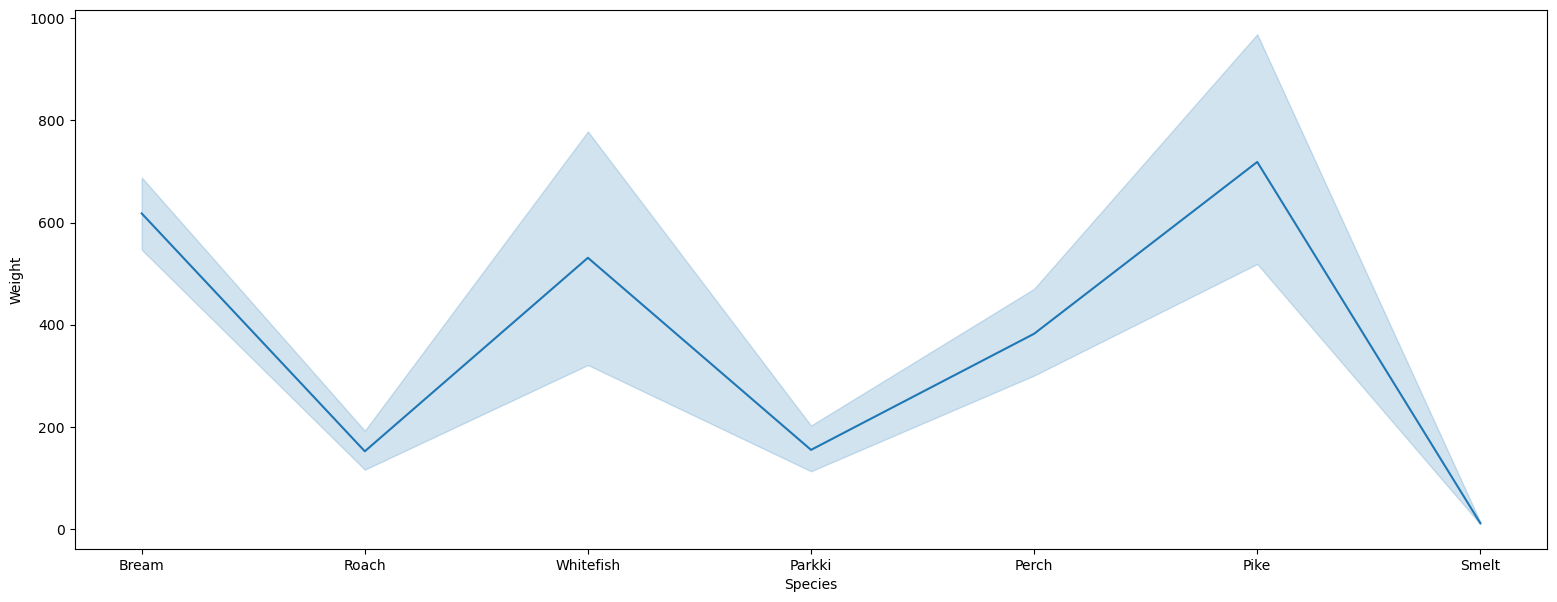

In [7]:
plt.figure(figsize=(19,7))
sns.lineplot(x='Species',y='Weight', data=df)
plt.show()

### Then with the Help of pie chart and plotbar i find out that The Bream Species Have The largest Weight

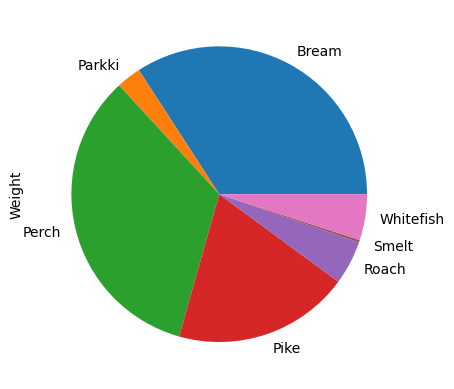

In [8]:
SPECIES_Weight=df.groupby(['Species'])['Weight'].sum()
SPECIES_Weight.plot.pie();

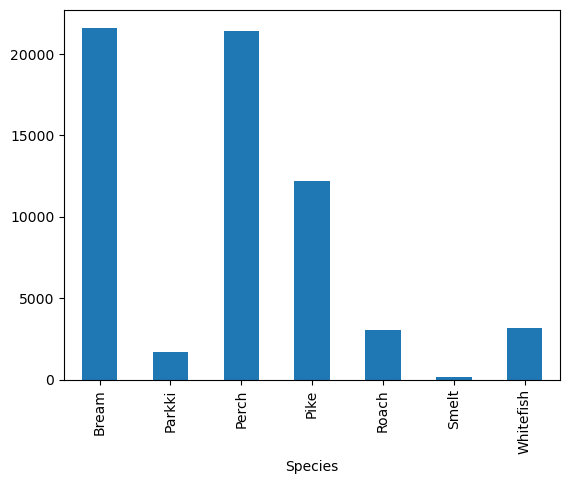

In [9]:
SPECIES_Weight.plot.bar();

## Univariate Analysis

### Plotting dist_plot with the data set

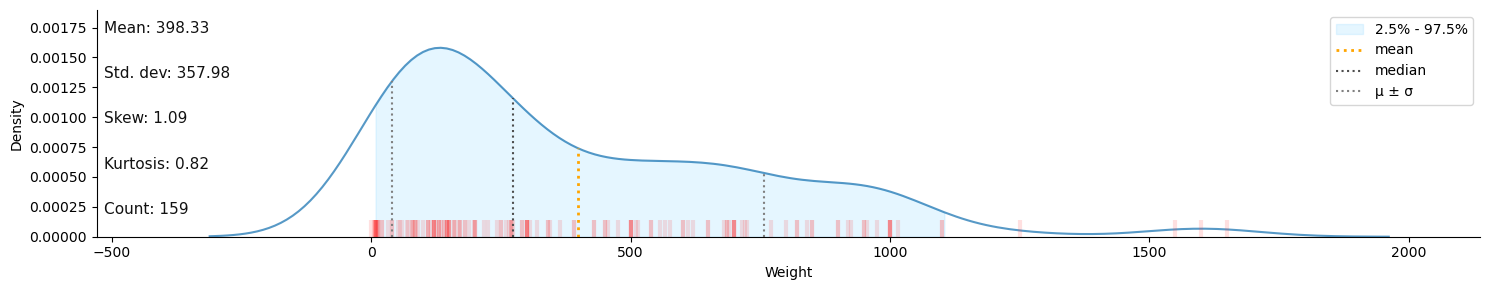

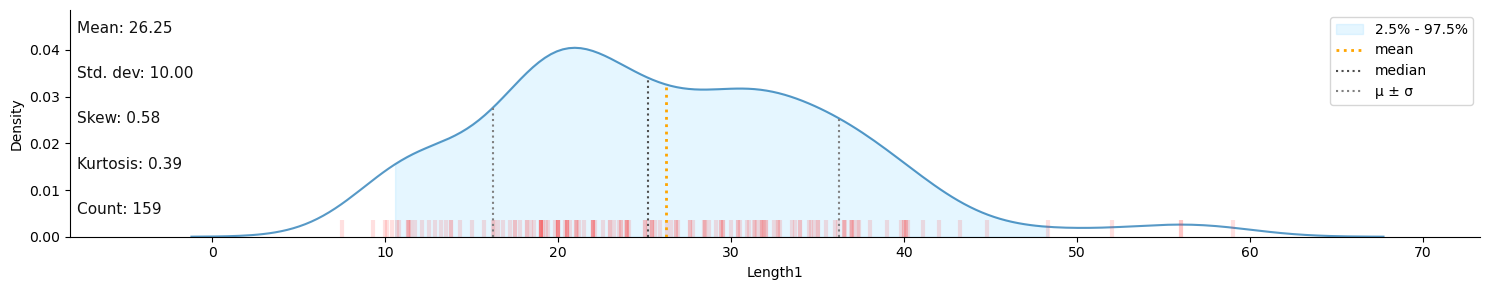

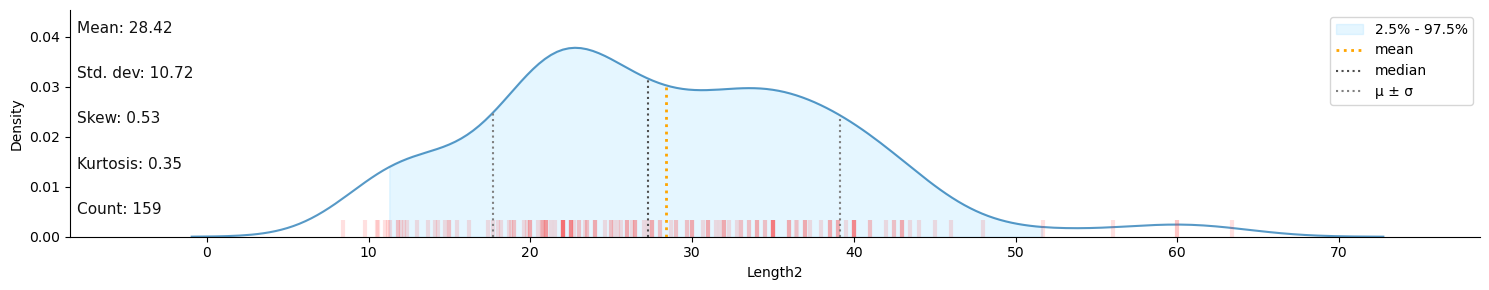

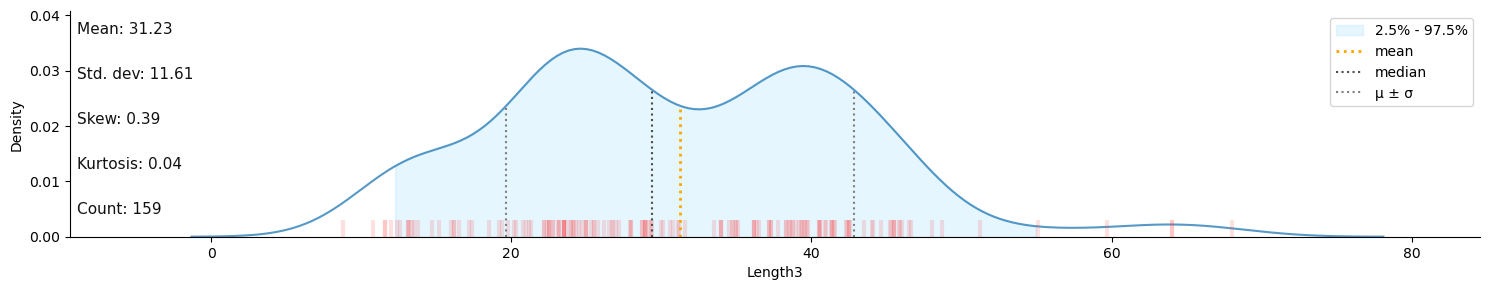

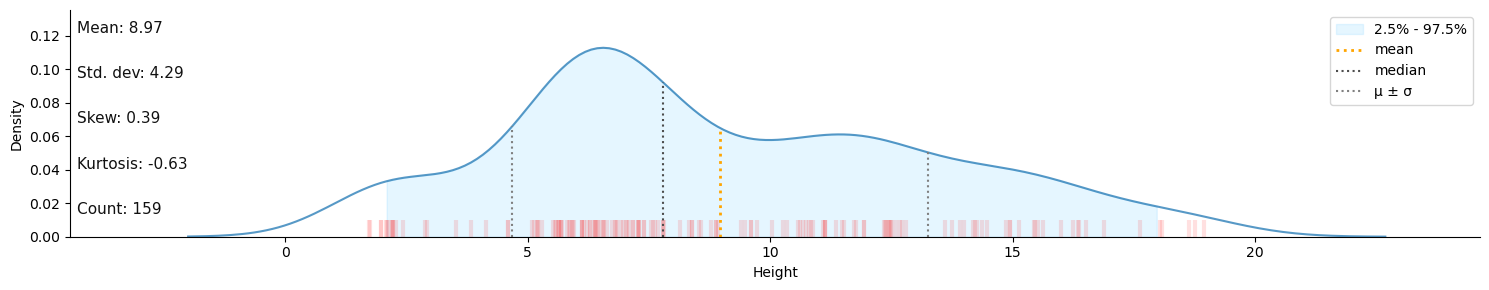

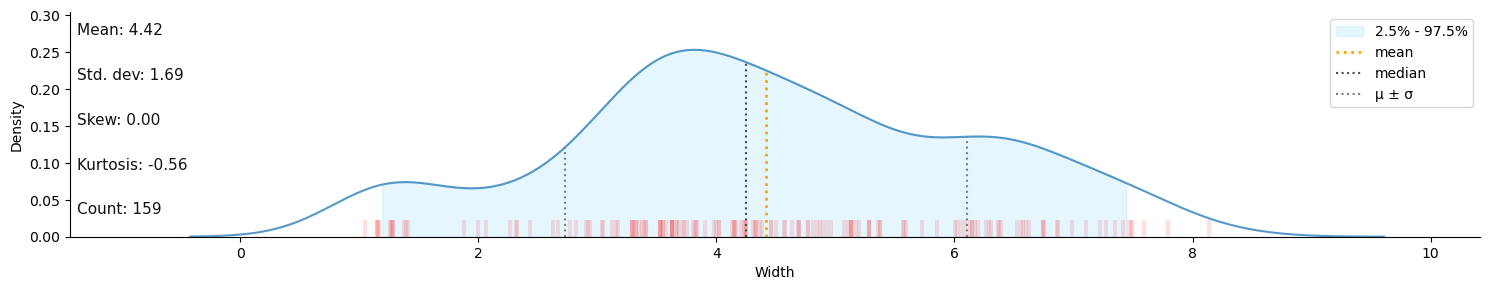

In [10]:
k.dist_plot(df);

### Analyzing the Data set by Plotiing the Histpot

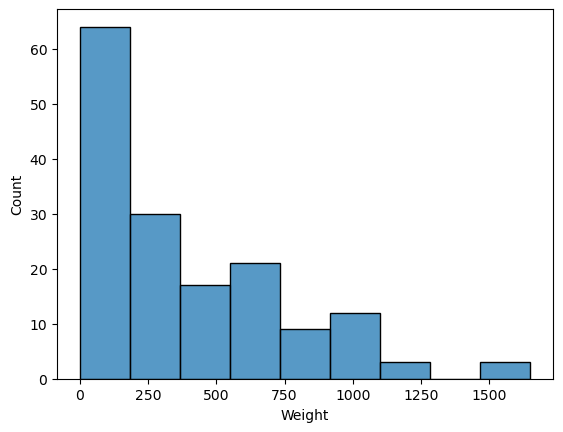

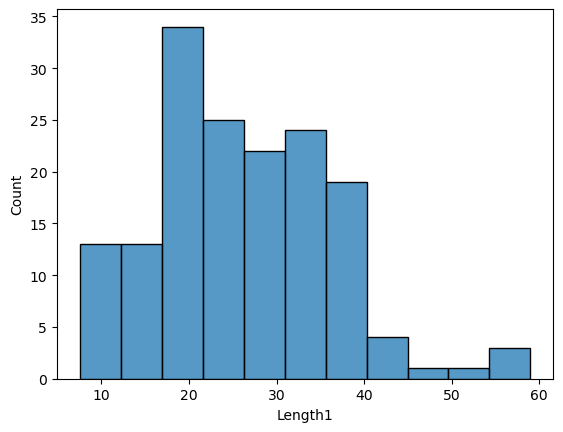

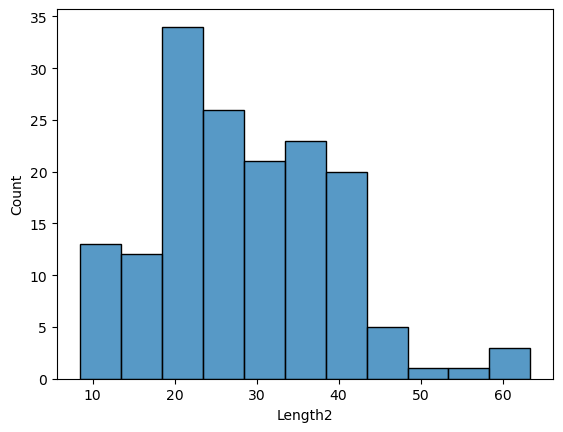

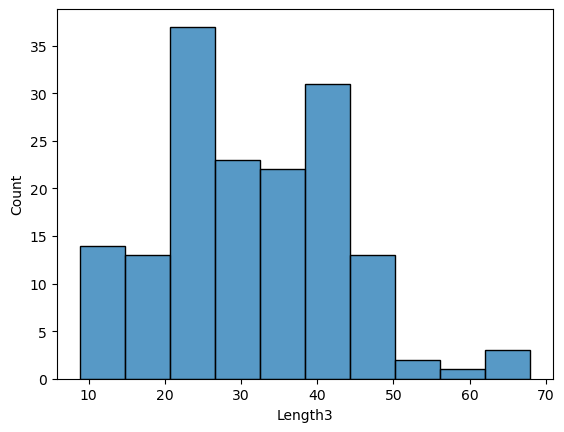

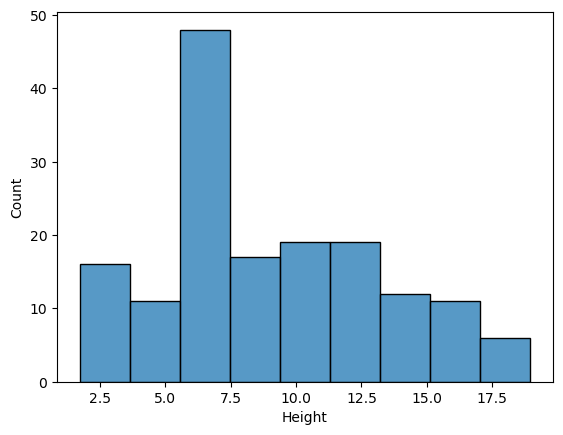

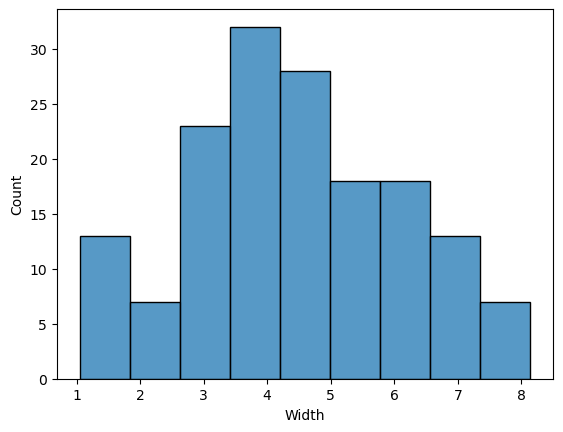

In [11]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.histplot(x=df[i])
    plt.show()

### Analyzing the Data set by Plotiing the kdeplot

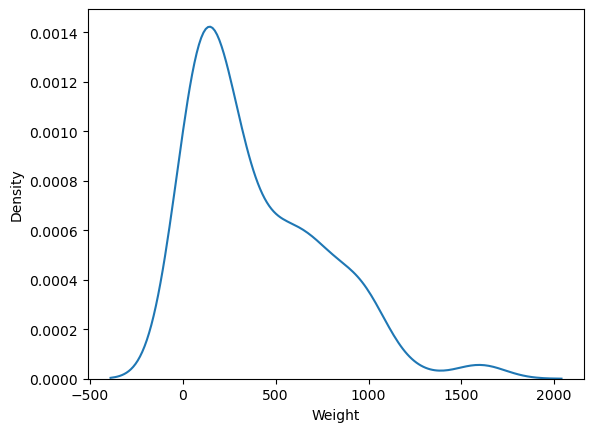

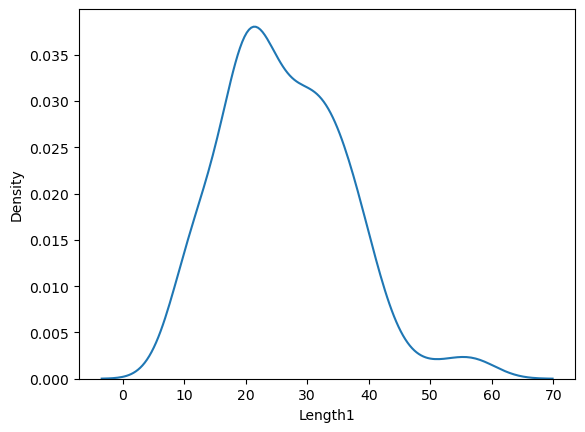

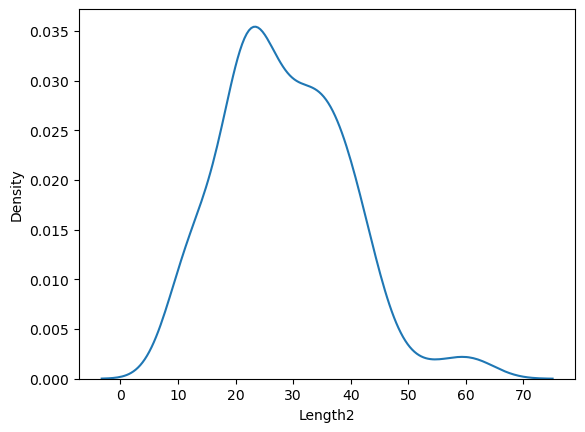

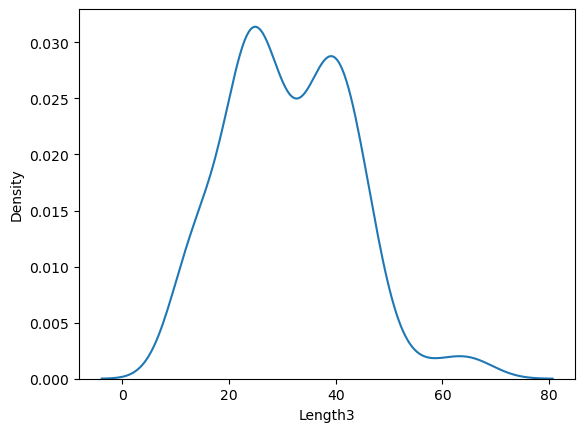

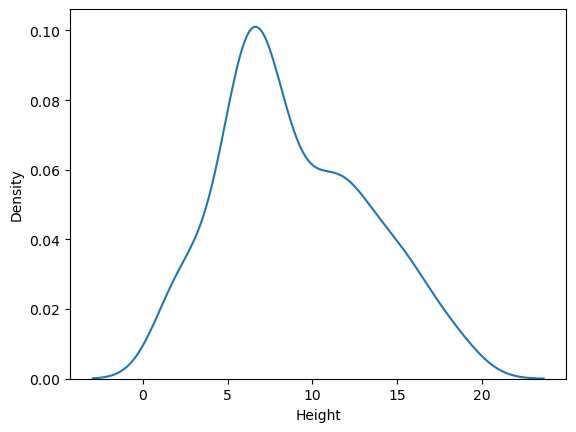

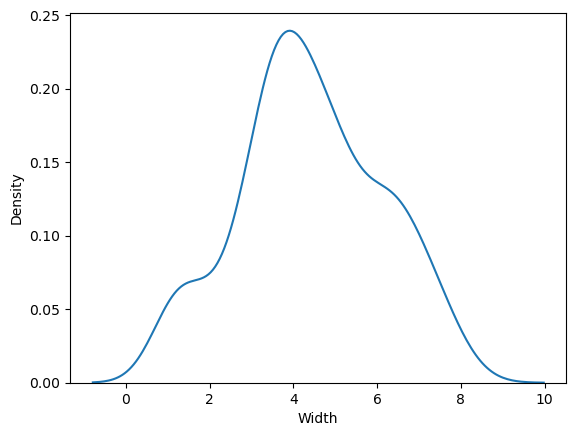

In [12]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.kdeplot(x=df[i])
        plt.show()

### Analyzing the Data set by Plotiing the Boxplot to find out the outliers

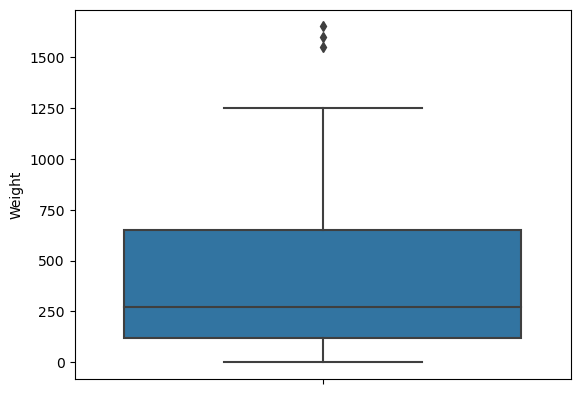

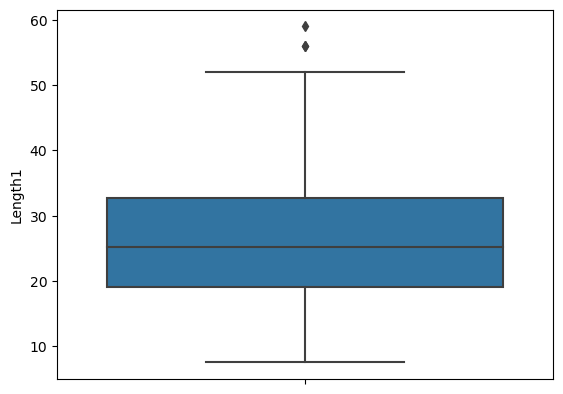

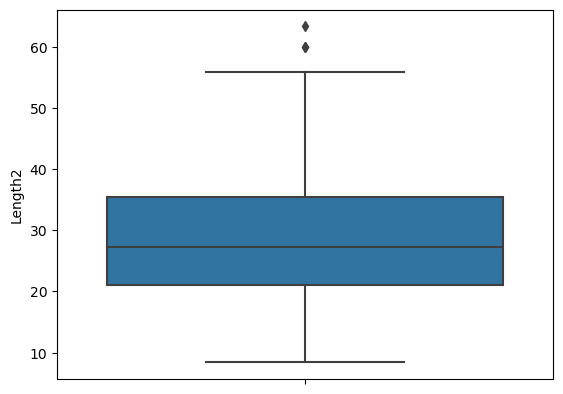

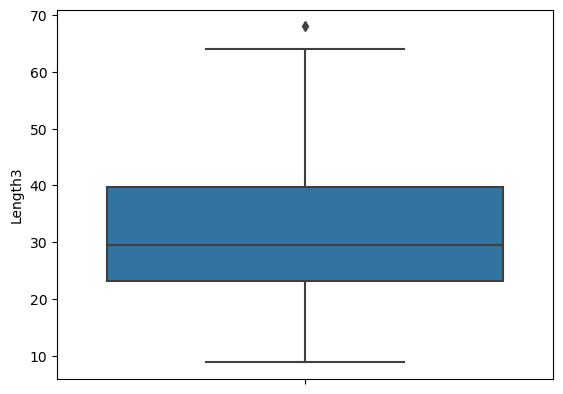

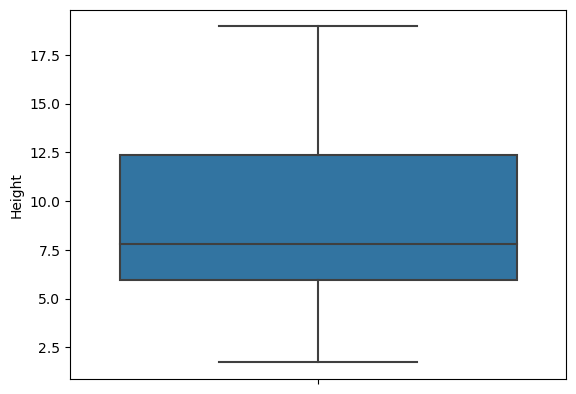

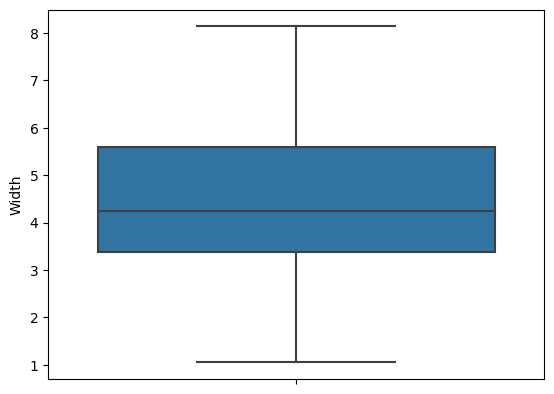

In [13]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i])
        plt.show()

### From above boxplot we can see that there is outliers present in the dataset so i removed it by using the following code

In [14]:
def outlier_limit(col):
    Q1 , Q3 = np.nanpercentile(col, [25, 75])
    IQR = Q3 - Q1
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR
    return LL, UL

In [15]:
for col in df.columns:
    if df[col].dtype != "object":
        LL, UL = outlier_limit(df[col])
        df[col] = np.where((df[col] > UL) | (df[col] < LL), np.nan, df[col])

### After removing outliers Again i plot the boxplot to recheck wheather there is any outliers present in it or not

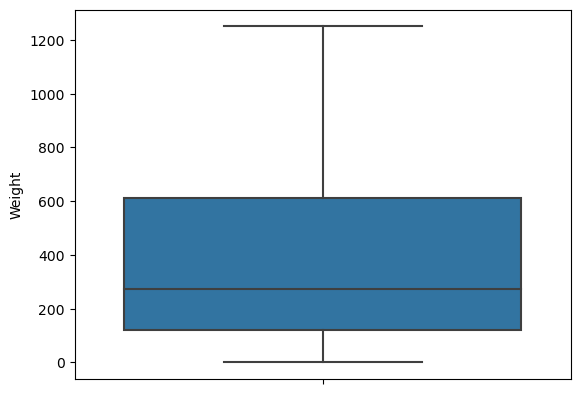

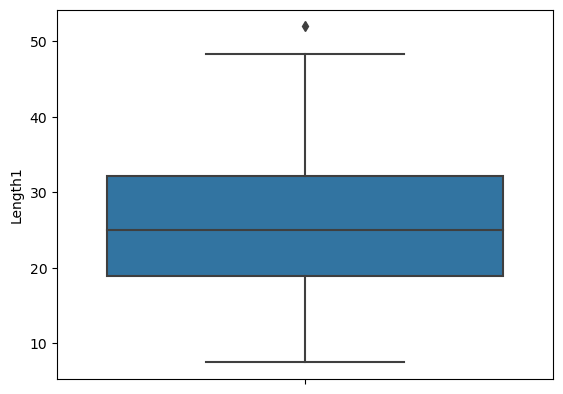

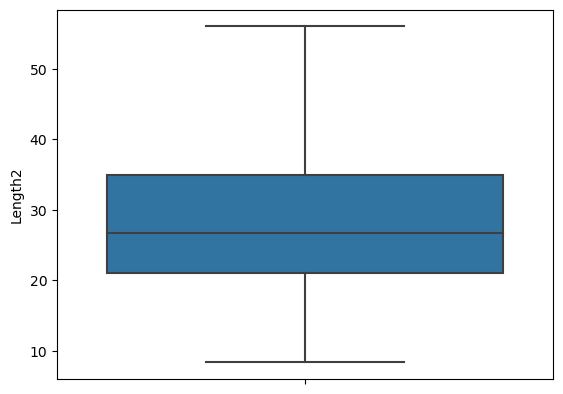

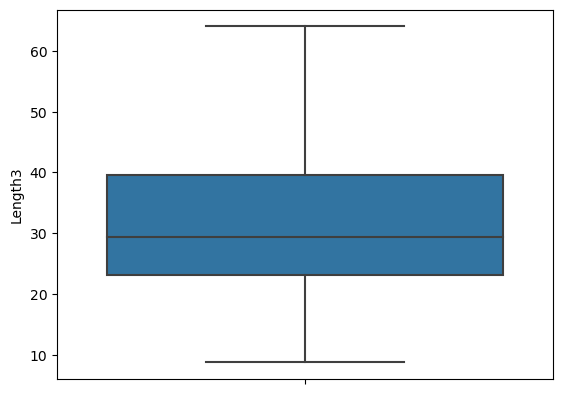

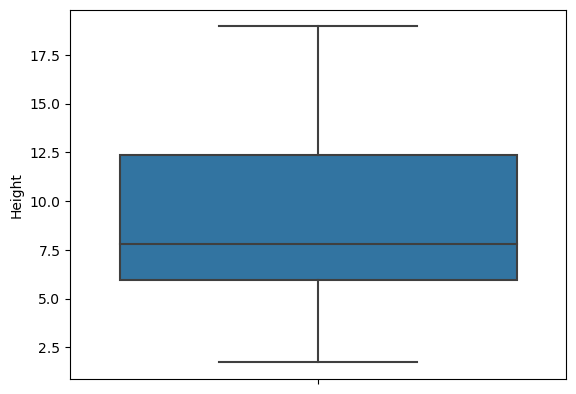

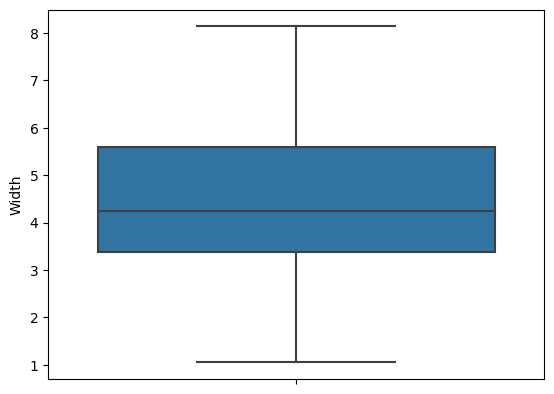

In [16]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i])
        plt.show()

### From the boxplot i figuerd out that there is no outliers are existing so then i recheck the data set to find  wheather there is any null values in the dataset

In [17]:
df.isnull().sum()

Species    0
Weight     3
Length1    3
Length2    3
Length3    1
Height     0
Width      0
dtype: int64

### so i dropped the null value

In [18]:
df.dropna(inplace=True)

### Then i import kilb to find out the corelation

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

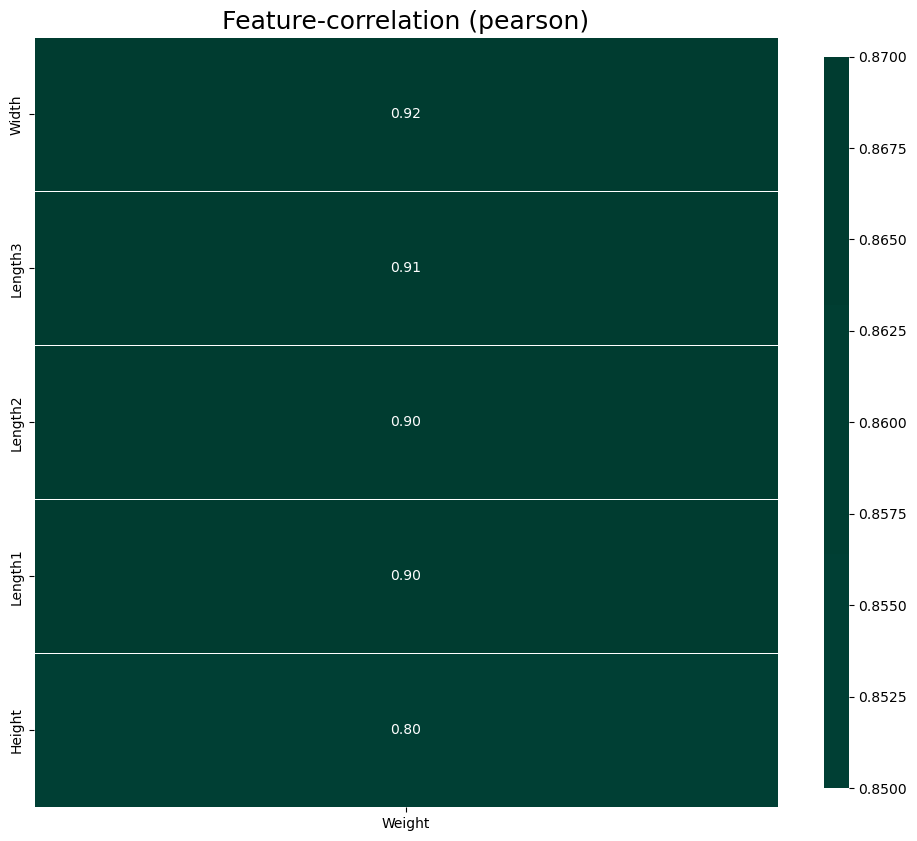

In [20]:
import klib as k
k.corr_plot(data=df,target='Weight')

### Convert Categorical values in column 'Species' in to numericales values to get more accurate correlation

In [21]:
le=LabelEncoder()
df["Species"]=le.fit_transform(df["Species"])

### Then i take "Species","Length1","Length2","Length3","Height","Width" in x and Weight values in y for prediction purpose

In [22]:
x=df[["Species","Length1","Length2","Length3","Height","Width"]].values
y=df[["Weight"]].values

### Then i take MinMaxScaler for scalling and then i done cross validation to find out the best model

In [23]:
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [24]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    
}

In [25]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  142.22214950548147
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  146.0375231322822
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  130.6356090229858
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  126.5733148035542
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  75.15197174294876
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  103.82738751316552
**************************************************

### After Checking the Average RMSE of each model I find out that GradientBoostingRegressor   is the best model and then i fit that model for further purpose

In [26]:
rfr=GradientBoostingRegressor()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [28]:
rfr.fit(x_train, y_train)

GradientBoostingRegressor()

In [29]:
print("model trained with {}".format(rfr))
training_score = rfr.score(x_train, y_train)*100
testing_score = rfr.score(x_test, y_test)*100
score = r2_score(y_test, rfr.predict(x_test))*100
mae = mean_absolute_error(y_test, rfr.predict(x_test))
mse = mean_squared_error(y_test, rfr.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with GradientBoostingRegressor()
r2score:  96.28481339250193
training_score:  99.92392010989312
testing_score:  96.28481339250193
mae:  39.5105829228452
mse:  3500.5026206794955
rmse_test:  59.16504559855841


### After finding out the r2score,training_score,testing_score,mae,mse,rmse_test of the given model GradientBoostingRegressor And Then i decided to predict the  'y' value

In [30]:
y_pred = rfr.predict(x)

### After predicting the y value i decided to compare it with actual value

In [31]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,242.0,257.027965
1,290.0,309.413155
2,340.0,324.631175
3,363.0,364.441765
4,430.0,431.274302
...,...,...
151,12.2,12.113908
152,13.4,12.113908
153,12.2,12.113908
154,19.7,18.282586


### Then I plott the Actual value vs predicted value with the help of scatterplot 

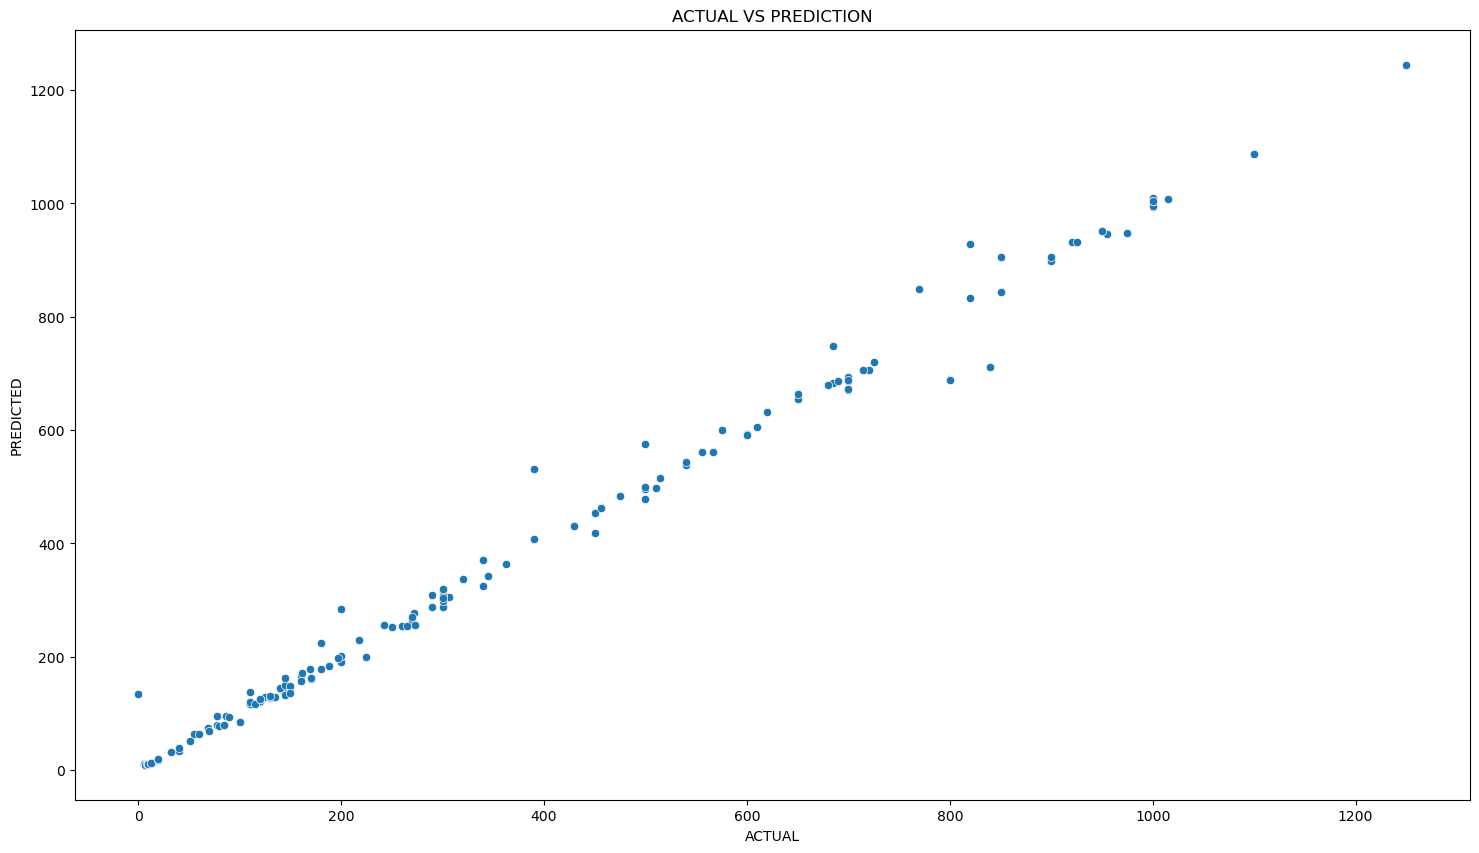

In [32]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()

## Conclusion

From all the conclusions  i find out that there is a large number of corelated values in between 0 to 200 and in the scatterplots And so  There is High amount of corelation Between weight of the fishes and other factors in the dataset.